# Forward and Backwards Propagation in Convolutional Neural Networks

This is a numerical example which will explain and implement how forward and backward propagation occurs in convolutional neural networks.

First, we will import all the python packages which will be required for a ground-up implementation of these concepts.

## Imports

In [132]:
%load_ext autoreload
%autoreload 2

import itertools

from imageio import imread

from matplotlib import pyplot as plt

import numpy as np

import cnn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load example data

![](https://img.icons8.com/pastel-glyph/2x/dog--v2.png)

In [133]:
!curl --silent "https://img.icons8.com/pastel-glyph/2x/dog--v2.png" > data/dog.png
dog = imread("data/dog.png");

We have a (256, 256, 4) image (RGBA) which we will flatten to a (256, 256) grayscale image normalized to the (0, 1) interval:

In [134]:
dog = dog[:, :, 3]
dog = dog - dog.min()
dog = dog / dog.max()
assert dog.shape == (256, 256)
assert dog.min() == 0
assert dog.max() == 1

Let's se if we still have the correct image.

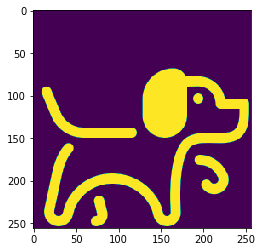

In [135]:
plt.imshow(dog);

## Kernels

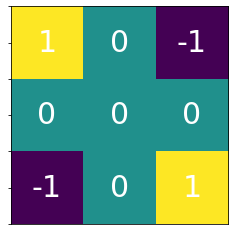

In [140]:
kernel = cnn.Kernel(weights=[[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
kernel.plot()

### Example kernel

![](https://miro.medium.com/max/1522/1*32zCSTBi3giSApz1oQV-zA.gif)

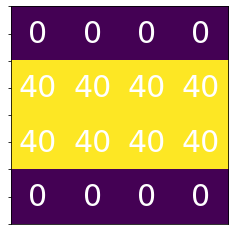

In [153]:
input_ = np.array([
    [10, 10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
])
kernel = cnn.Kernel(
    weights=[
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1],
    ],
)
cnn.plot_matrix(kernel.convolute(input_, stride=(1, 1)))

## Convolution

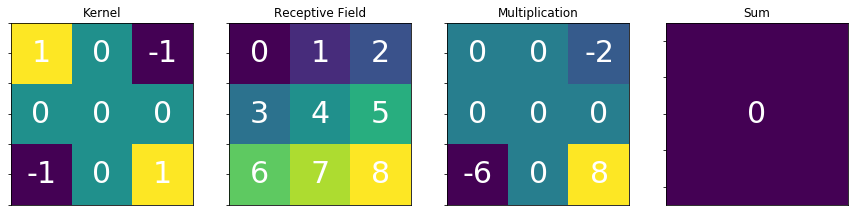

In [141]:
receptive_field = np.arange(0, 9)
receptive_field.shape = (3, 3)
kernel.plot_convolution(receptive_field)

## Image convolution

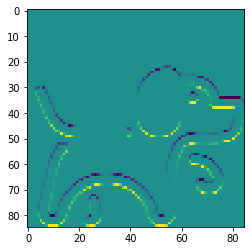

In [154]:
convolution = kernel.convolute(dog, stride=(3, 3))
plt.imshow(convolution);

## Max Pooling

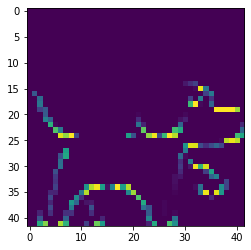

In [155]:
max_pool = cnn.MaxPool(shape=(2, 2), stride=(2, 2))
pool_layer = max_pool.pool(convolution)
plt.imshow(pool_layer);

In [156]:
print(convolution.shape)
print(pool_layer.shape)

(85, 85)
(42, 42)


![](https://vernlium.github.io/2018/10/15/coursera-deeplearning-ai-c4-week1/maxpool_animation.gif)

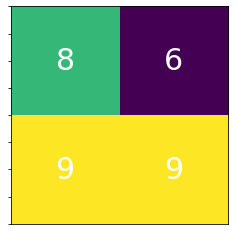

In [157]:
input_ = np.array([
    [7, 3, 5, 2],
    [8, 7, 1, 6],
    [4, 9, 3, 9],
    [0, 8, 4, 5],
])
cnn.plot_matrix(max_pool.pool(input_))